# **Programa de Pós-Graduação em Computação - INF/UFRGS**

---


### Disciplina CMP263 - Aprendizagem de Máquina
#### *Profa. Mariana Recamonde-Mendoza (mrmendoza@inf.ufrgs.br)*
<br>

---
***Observação:*** *Este notebook é disponibilizado aos alunos como complemento às aulas  e aos slides preparados pela professora. Desta forma, os principais conceitos são apresentados no material teórico fornecido. O objetivo deste notebook é reforçar os conceitos e demonstrar questões práticas no uso de algoritmos e estratégias de avaliação em Aprendizado de Máquina.*


---

##**Tópico: Naïve Bayes**


**Objetivos do notebook:**
-  Demonstrar o processo de treinamento e avaliação de modelos com o algoritmo Naïve Bayes e a técnica Holdout;
- Explorar o modelo Naïve Bayes, em termos de parâmetros estimados e fronteira de decisão gerada.

In [2]:
%pip install numpy pandas matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
## Naive Bayes com dados de câncer de mama

# 1. Importando bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap

# 2. Carregando o dataset a partir do sklearn
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

print("Features:", cancer.feature_names[:10], "...")
print("Classes:", cancer.target_names)

# 3. Dividir em treino e teste, de forma estratificada
# O uso do random_state visa garantir reprodutibilidade dos experimentos.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)


Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'] ...
Classes: ['malignant' 'benign']


In [4]:
# 4. Treinar modelo Naive Bayes Gaussiano, com configuração padrão de hiperparâmetros
# Na etapa de treinamento, o algoritmo estima todas as probabilidades envolvidas na tomada de decisão
nb = GaussianNB()
nb.fit(X_train, y_train)


,priors,None
,var_smoothing,1e-09


In [5]:
import pandas as pd

# Número de instâncias por classe
print("Número de instâncias por classe:", nb.class_count_)

# Probabilidade a priori das classes
print("Probabilidades a priori:", nb.class_prior_)

# Médias das features por classe
df_means = pd.DataFrame(nb.theta_, columns=cancer.feature_names, index=cancer.target_names)
print("\nMédias estimadas por classe:")
display(df_means)

# Variâncias das features por classe
df_vars = pd.DataFrame(nb.var_, columns=cancer.feature_names, index=cancer.target_names)
print("\nVariâncias estimadas por classe:")
display(df_vars)


Número de instâncias por classe: [148. 250.]
Probabilidades a priori: [0.3718593 0.6281407]

Médias estimadas por classe:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
malignant,17.447770,21.647365,115.229459,973.026351,0.102433,0.145421,0.161745,0.087470,0.192947,0.062675,...,21.180270,29.481892,141.713851,1424.598649,0.145122,0.388119,0.473537,0.185298,0.330267,0.092647
benign,12.108324,17.976480,77.768880,460.016800,0.091856,0.078115,0.045053,0.024711,0.173120,0.062730,...,13.357644,23.646280,86.800720,557.114800,0.124644,0.179648,0.163372,0.072563,0.270839,0.079246



Variâncias estimadas por classe:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
malignant,9.561293,16.448349,444.059510,116026.203611,0.000465,0.003251,0.005789,0.001452,0.001144,0.000379,...,18.153807,31.457159,860.042245,340704.083966,0.000765,0.031840,0.036430,0.002554,0.006323,0.000836
benign,3.075725,17.415668,134.852702,17338.693397,0.000474,0.001420,0.002567,0.000561,0.000934,0.000368,...,3.848937,32.310112,180.943947,26155.130620,0.000716,0.008577,0.021192,0.001552,0.002189,0.000522


Acurácia: 0.9473684210526315

Relatório de Classificação:
               precision    recall  f1-score   support

   malignant       0.97      0.89      0.93        64
      benign       0.94      0.98      0.96       107

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



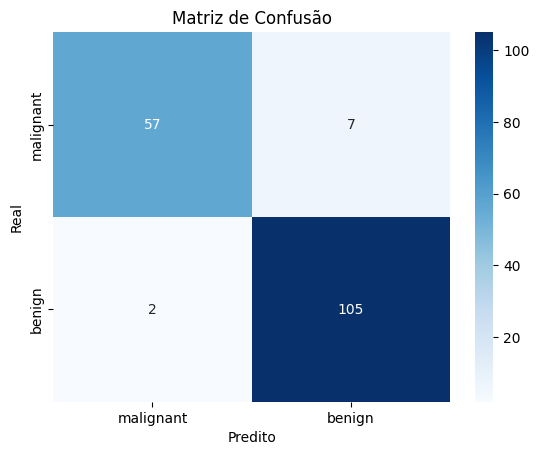

In [6]:
# 5. Avaliar modelo
y_pred = nb.predict(X_test)
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred, target_names=cancer.target_names))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=cancer.target_names, yticklabels=cancer.target_names, cmap='Blues')
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()


In [7]:
#Como referência, vamos avaliar o desempenho nos dados de treino, para averiguar o risco de overfitting
y_pred_train = nb.predict(X_train)
print("Acurácia:", accuracy_score(y_train, y_pred_train))

Acurácia: 0.9447236180904522


In [8]:
# 6. Mostrar probabilidades em alguns exemplos do teste
print("Exemplos de probabilidades preditas:")
for i in range(5):
    probs = nb.predict_proba([X_test[i]])[0]
    print(f"Exemplo {i}: Probabilidades = {probs}, Classe real = {cancer.target_names[y_test[i]]}, Classe predita = {cancer.target_names[y_pred[i]]}")


Exemplos de probabilidades preditas:
Exemplo 0: Probabilidades = [1.00000000e+00 3.21035602e-18], Classe real = malignant, Classe predita = malignant
Exemplo 1: Probabilidades = [4.08321854e-11 1.00000000e+00], Classe real = benign, Classe predita = benign
Exemplo 2: Probabilidades = [4.00569177e-08 9.99999960e-01], Classe real = benign, Classe predita = benign
Exemplo 3: Probabilidades = [1.00000000e+00 5.05616545e-41], Classe real = malignant, Classe predita = malignant
Exemplo 4: Probabilidades = [0.01650255 0.98349745], Classe real = malignant, Classe predita = benign


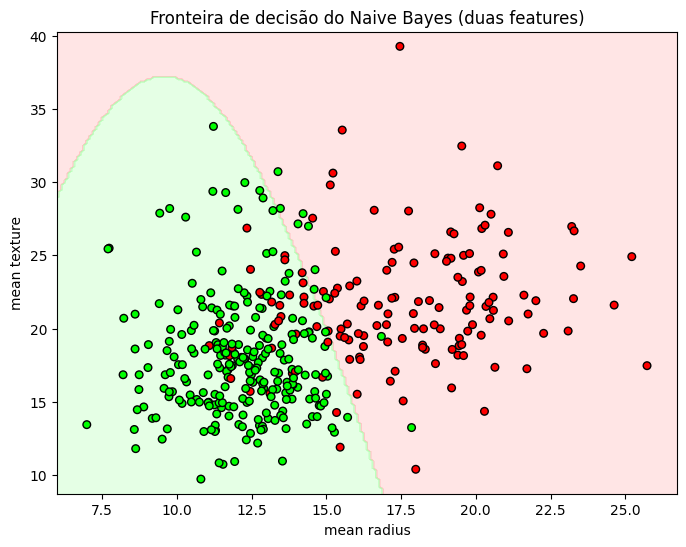

In [9]:
# 7. Plotar fronteira de decisão (usando só duas features para visualização)
# Vamos escolher as duas primeiras features para simplificação
X_vis = X_train[:, :2]
X_test_vis = X_test[:, :2]

nb_vis = GaussianNB()
nb_vis.fit(X_vis, y_train)

# Criar grid para plotar
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

Z = nb_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(["#FFAAAA", "#AAFFAA"]))
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_train, edgecolor='k', cmap=ListedColormap(["#FF0000", "#00FF00"]), s=30)
plt.xlabel(cancer.feature_names[0])
plt.ylabel(cancer.feature_names[1])
plt.title("Fronteira de decisão do Naive Bayes (duas features)")
plt.show()


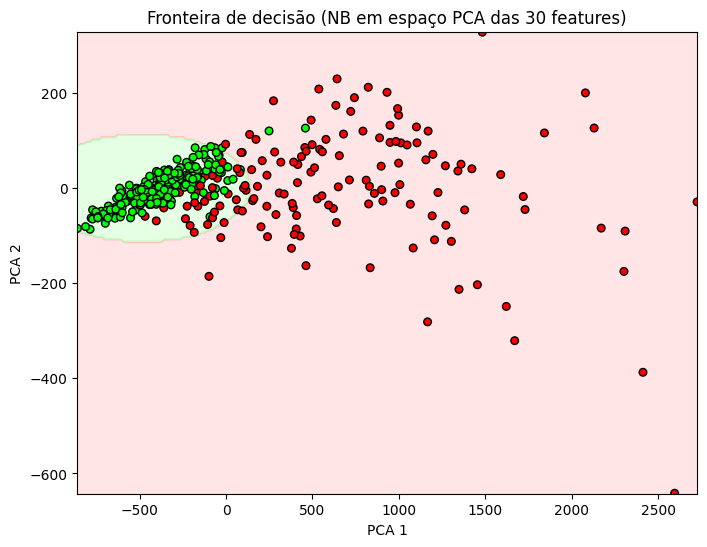

In [10]:
from sklearn.decomposition import PCA

# Reduzindo para 2 componentes
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Treinar NB no espaço reduzido
nb_pca = GaussianNB()
nb_pca.fit(X_train_pca, y_train)

# Grid para plotar
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

Z = nb_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(["#FFAAAA", "#AAFFAA"]))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolor='k', cmap=ListedColormap(["#FF0000", "#00FF00"]), s=30)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Fronteira de decisão (NB em espaço PCA das 30 features)")
plt.show()
